In [1]:
import torch
import torch.backends.cudnn as cudnn
import random
import numpy as np

import torch
from torch import nn
from torch.utils.data import DataLoader
import numpy as np
from torch.utils.data import Dataset
import pandas as pd
from tqdm import tqdm

import matplotlib.pyplot as plt
seed = 1443
cudnn.benchmark = False
cudnn.deterministic = True
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)



In [2]:
class Data(Dataset):
    def __init__(self, csv_file, transform=None):

        super(Data, self).__init__()
        file = pd.read_csv(csv_file)
        self.input_data = file[['x1', 'x2']].values
        self.labels = file['y'].values.astype(int)   
          
    def __getitem__(self, index):
        data_item = self.input_data[index]
        data_item = torch.tensor(data_item).float()

        label = self.labels[index]
        return data_item, label

    def __len__(self):
        return len(self.input_data)

In [3]:
train_data = Data('train_q4.csv')
test_data = Data('test_q4.csv')
batch_size = 256
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(2, 4),
            nn.ReLU(),
            nn.Linear(4,4),
            nn.ReLU(),
            nn.Linear(4, 3),
            nn.Softmax(dim=1)
        )
        self.initialize_weights()

        
    def forward(self, x):
        logits = self.linear_relu_stack(x)
        return logits
    
    def initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.kaiming_uniform_(m.weight)
                if m.bias is not None:
                     nn.init.zeros_(m.bias) 
train_dataloader = DataLoader(train_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

In [4]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model = NeuralNetwork().to(device)

In [5]:
learning_rate = 0.4

In [6]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [7]:
def train_model(model, train_dataloader, loss_fn, optimizer, device, epochs):
    data = np.zeros(epoches)
    for epoch in tqdm(range(epochs)):
        train_loss, correct = 0, 0
        for X, y in train_dataloader:
            X, y = X.to(device), y.to(device)

            pred = model(X)

            loss = loss_fn(pred, y.long())

            # Backpropagation
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # record loss
            train_loss += loss.item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
        size = len(train_dataloader.dataset)
        train_loss /= len(train_dataloader)
        data[epoch] = train_loss
        correct /= size
        if epoch % 20 == 0:
            print(f" Train accuracy: {(100*correct):>0.1f}%, Avg loss: {train_loss:>8f}")
    return data

# Usage


In [ ]:
learning_rate = 0.4
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
epoches = 100
data = train_model(model, train_dataloader, loss_fn, optimizer, device, epoches)
plt.plot(range(1, epoches + 1), data, label="Training loss")
plt.title(f'learning rate ={learning_rate}')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid()
plt.show()

In [ ]:
model.eval()
correct = 0
# Turn off gradient descent
with torch.no_grad():
    for X, y in tqdm(test_dataloader):
        X, y = X.to(device), y.to(device)
        pred = model(X)
        correct += (pred.argmax(1) == y).type(torch.float).sum().item()
size = len(test_dataloader.dataset)
correct = correct / size
print(f" Test accuracy: {(100*correct):>0.1f}%")

In [ ]:
learning_rate = 0.1
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
epoches = 100
data = train_model(model, train_dataloader, loss_fn, optimizer, device, epoches)
plt.plot(range(1, epoches + 1), data, label="Training loss")
plt.title(f'learning rate ={learning_rate}')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid()
plt.show()

In [ ]:
model.eval()
correct = 0
# Turn off gradient descent
with torch.no_grad():
    for X, y in tqdm(test_dataloader):
        X, y = X.to(device), y.to(device)
        pred = model(X)
        correct += (pred.argmax(1) == y).type(torch.float).sum().item()
size = len(test_dataloader.dataset)
correct = correct / size
print(f" Test accuracy: {(100*correct):>0.1f}%")


  1%|          | 1/100 [00:01<02:34,  1.57s/it]

 Train accuracy: 25.5%, Avg loss: 1.275645


 21%|██        | 21/100 [00:13<00:29,  2.66it/s]

 Train accuracy: 28.2%, Avg loss: 1.253141


 41%|████      | 41/100 [00:21<00:24,  2.36it/s]

 Train accuracy: 30.9%, Avg loss: 1.225198


 61%|██████    | 61/100 [00:29<00:18,  2.15it/s]

 Train accuracy: 33.9%, Avg loss: 1.197524


 81%|████████  | 81/100 [00:37<00:06,  2.81it/s]

 Train accuracy: 37.1%, Avg loss: 1.169121


100%|██████████| 100/100 [00:48<00:00,  2.08it/s]


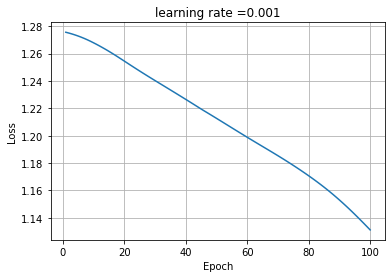

In [8]:
learning_rate = 0.001
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
epoches = 100
data = train_model(model, train_dataloader, loss_fn, optimizer, device, epoches)
plt.plot(range(1, epoches + 1), data, label="Training loss")
plt.title(f'learning rate ={learning_rate}')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid()
plt.show()

In [9]:
model.eval()
correct = 0
# Turn off gradient descent
with torch.no_grad():
    for X, y in tqdm(test_dataloader):
        X, y = X.to(device), y.to(device)
        pred = model(X)
        correct += (pred.argmax(1) == y).type(torch.float).sum().item()
size = len(test_dataloader.dataset)
correct = correct / size
print(f" Test accuracy: {(100*correct):>0.1f}%")

100%|██████████| 8/8 [00:00<00:00, 61.27it/s]

 Test accuracy: 44.8%
